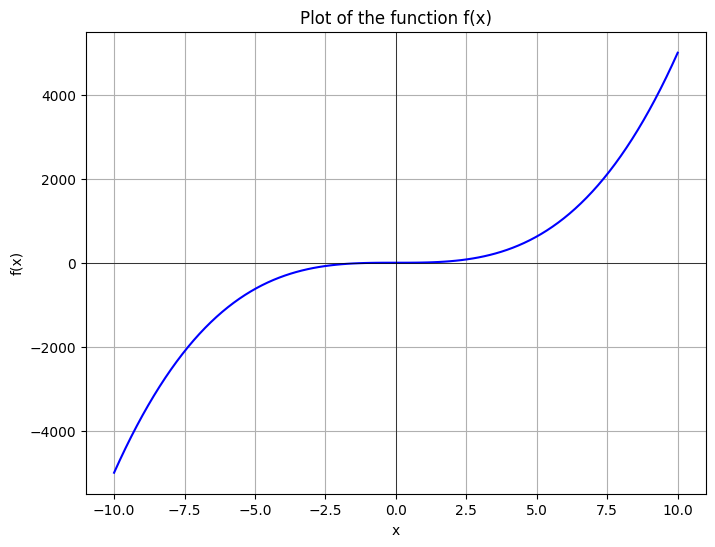

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the symbol and function
x = sp.Symbol('x')
fx = input('Input f(x): ')

# Get user input for the range of x
x1 = float(input('Start of x: '))
x2 = float(input('End of x: '))

# Generate x values
xx = np.linspace(x1, x2, 100)

# Convert the sympy function to a numpy function
f_lambdified = sp.lambdify(x, fx, 'numpy')

# Compute y values
yy = f_lambdified(xx)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [48]:
f_prime = sp.diff(fx, x)

# Convert the SymPy function to a numpy-compatible function
f_lambdified = sp.lambdify(x, fx, 'numpy')


# Solve for critical points
critical_points = sp.solve(f_prime, x)

# Filter out non-real critical points and convert to floats
real_critical_points = [float(cp.evalf()) for cp in critical_points if cp.is_real and x1 <= float(cp.evalf()) <= x2]

# Combine input range with critical points and sort
x_values = np.array([x1, x2] + real_critical_points)

# Evaluate the function at these x values
y_values = f_lambdified(x_values)

# Find the minimum and maximum values of the function
y_min, y_max = y_values.min(), y_values.max()

print(f"Minimum value of the function in the range [{x1}, {x2}]: {y_min}")
print(f"Maximum value of the function in the range [{x1}, {x2}]: {y_max}")


Minimum value of the function in the range [-10.0, 10.0]: -5001.0
Maximum value of the function in the range [-10.0, 10.0]: 4999.0


In [49]:
f_prime_lambdified = sp.lambdify(x, f_prime, 'numpy')

# Generate a range of x values
x_range = np.linspace(x1, x2, 100)

# Compute the derivative values for the range of x
y_prime_vals = f_prime_lambdified(x_range)

# Check if the function is increasing or decreasing in the input range
if np.all(y_prime_vals < 0):
    print(f"The function is decreasing in the input range [{x1}, {x2}]")
elif np.all(y_prime_vals > 0):
    print(f"The function is increasing in the input range [{x1}, {x2}]")
else:
    # Identify critical points within the range
    critical_points = sp.solve(f_prime, x)
    # Filter out non-real solutions
    real_critical_points = [float(cp.evalf()) for cp in critical_points if cp.is_real and x1 <= float(cp.evalf()) <= x2]
    real_critical_points.sort()

    # Evaluate intervals around critical points
    intervals = [(x1, real_critical_points[0])] if real_critical_points else [(x1, x2)]
    intervals.extend((real_critical_points[i], real_critical_points[i+1]) for i in range(len(real_critical_points) - 1))
    if real_critical_points:
        intervals.append((real_critical_points[-1], x2))

    increasing_intervals = []
    decreasing_intervals = []

    for start, end in intervals:
        mid_point = (start + end) / 2
        mid_val = f_prime_lambdified(mid_point)
        if mid_val > 0:
            increasing_intervals.append((start, end))
        else:
            decreasing_intervals.append((start, end))

    print("Increasing intervals:", increasing_intervals)
    print("Decreasing intervals:", decreasing_intervals)


The function is increasing in the input range [-10.0, 10.0]
